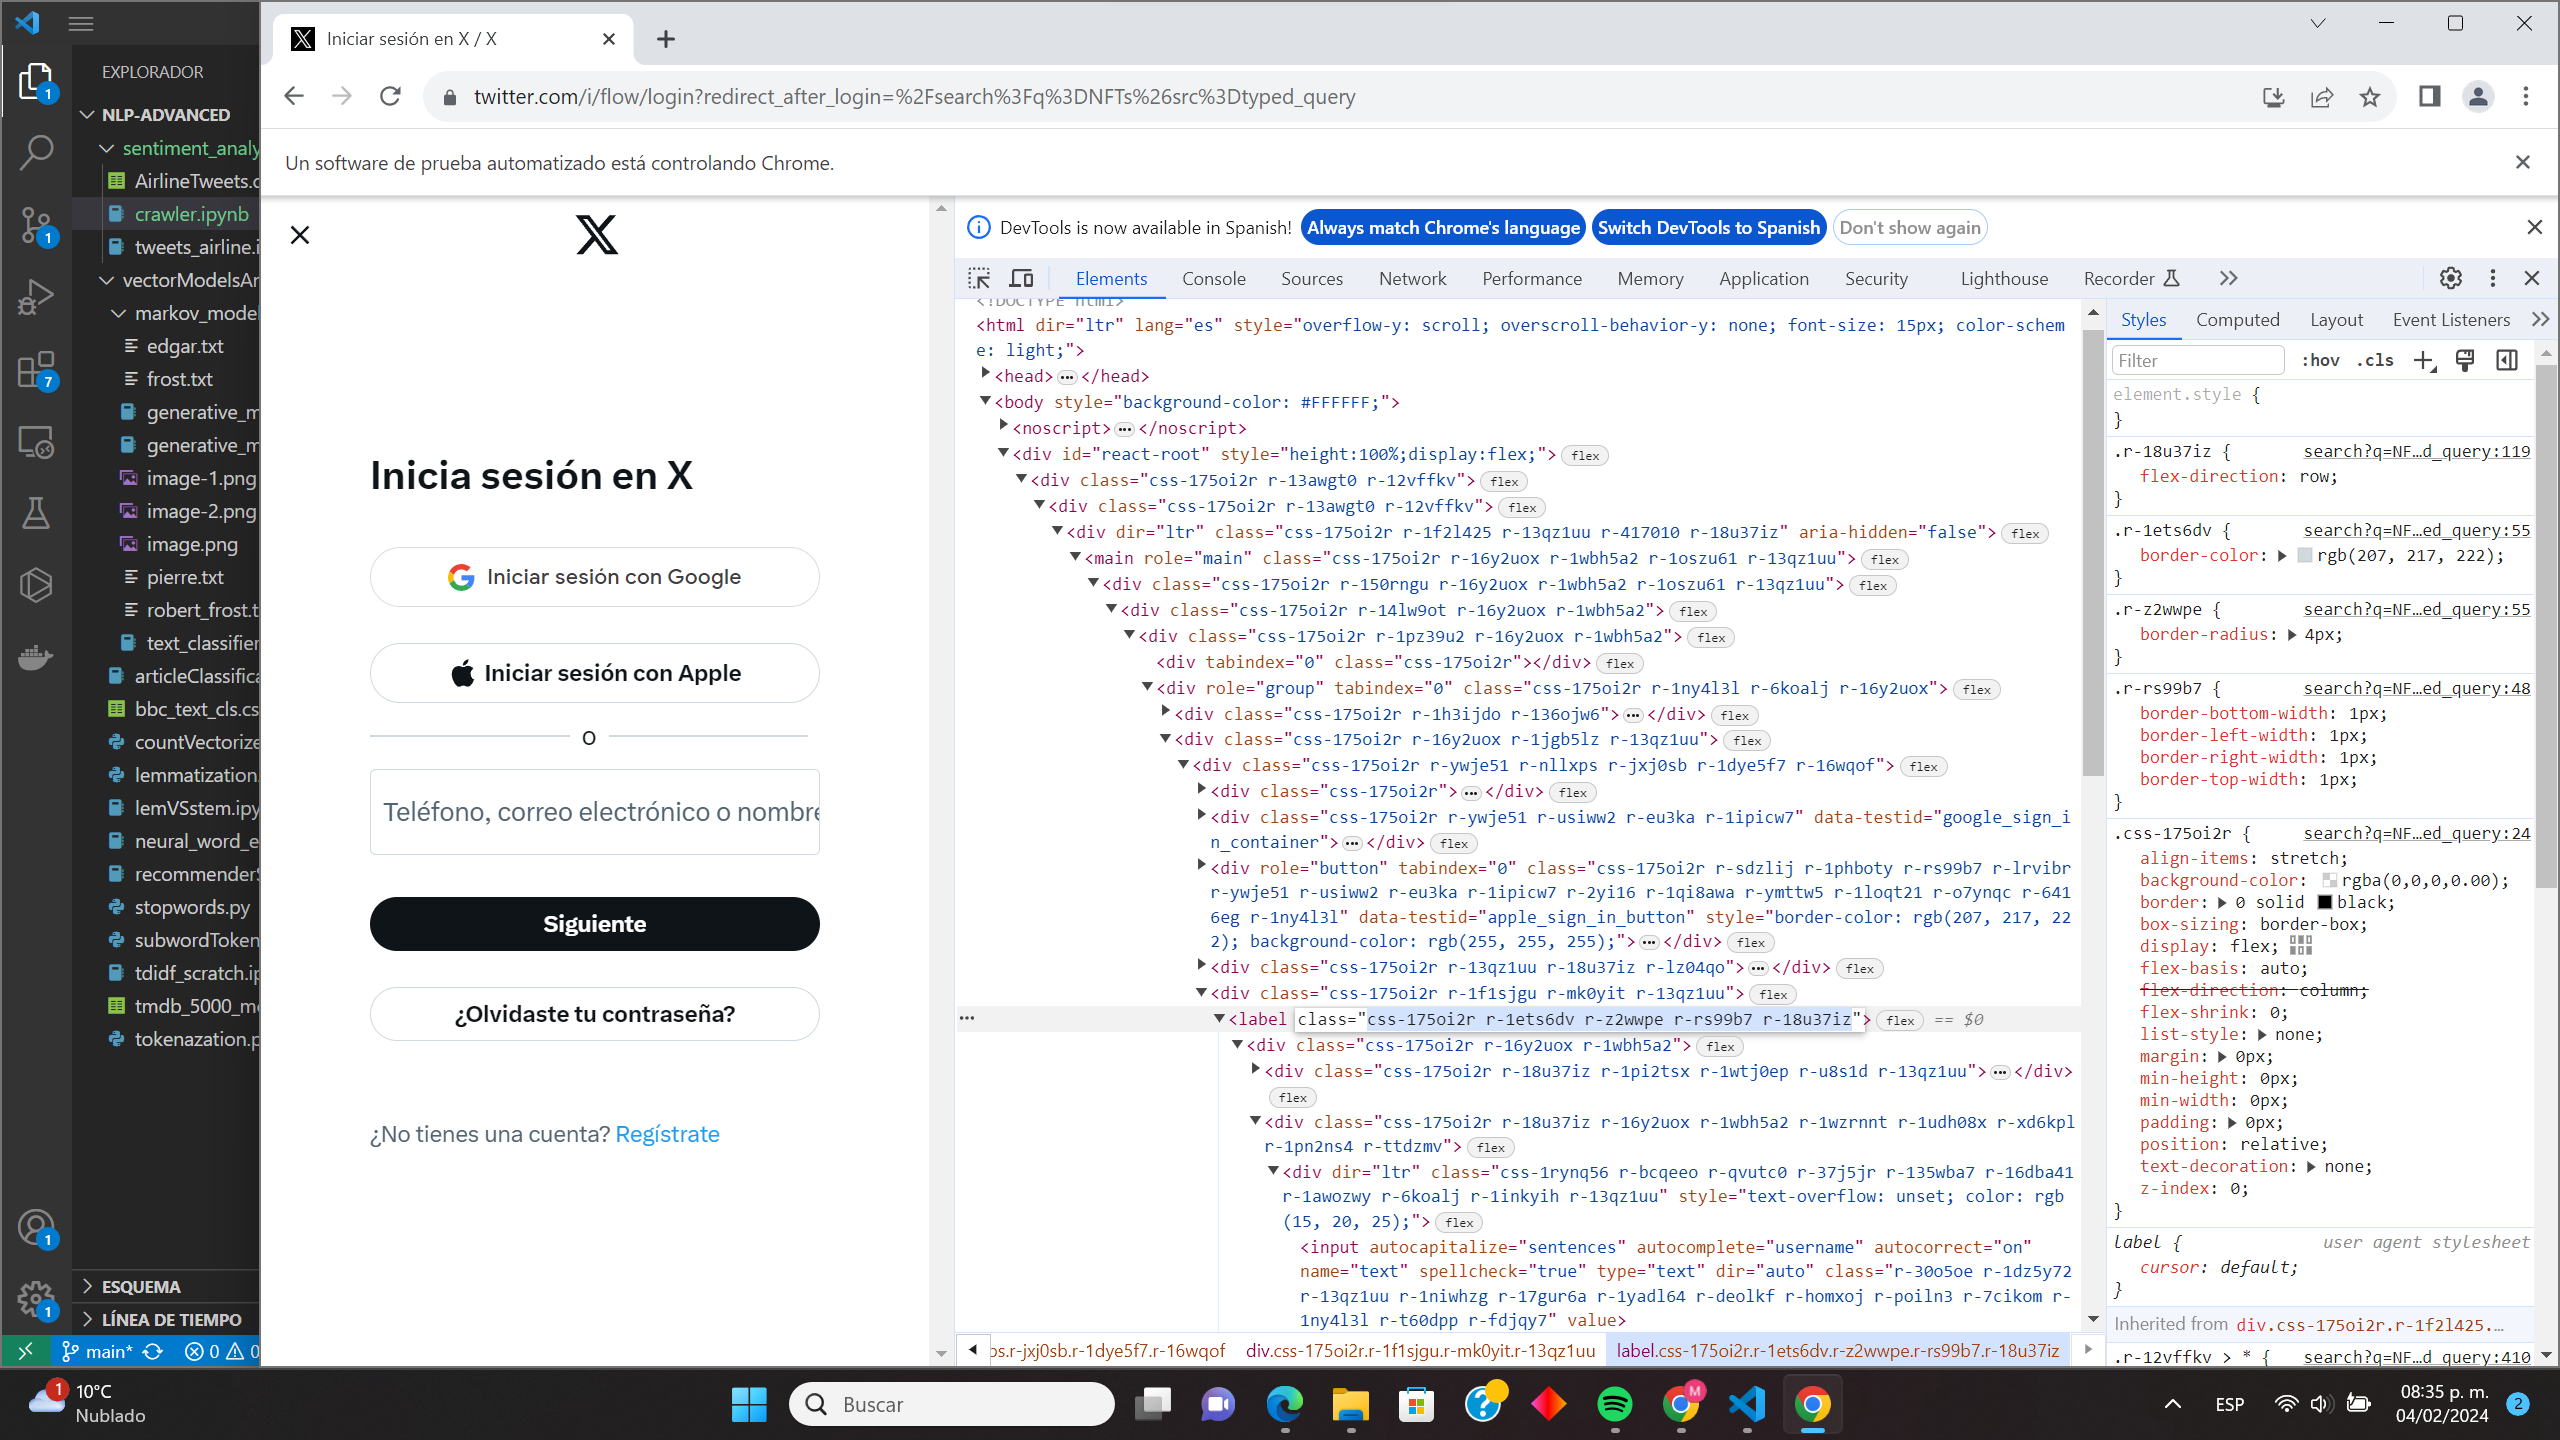

Documentation

Finding elements by: https://selenium-python.readthedocs.io/locating-elements.html


In [58]:
# Before you start:
# 1. set the path to chromedriver
# 2. set the path where the files are to be saved

# to work with the site:
import requests
import selenium
import webbrowser
from selenium import webdriver
from selenium.webdriver.common.by import By

# to download html:
from bs4 import BeautifulSoup

# to write the files:
from datetime import date
import os

import re

import pandas as pd
import numpy as np
import time

In [59]:
driver = webdriver.Chrome()

In [60]:
! pip3 install --user linkedin_scraper


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


I could use this library to scrap information of the person since each article has a person, this way we could determine how important and influencial this person is.

We could scrape:

Person
- Name
- Profile URL
- job_title
- company

Company

Company(linkedin_url=None, name=None, about_us=None, website=None, headquarters=None, founded=None, company_type=None, company_size=None, specialties=None, showcase_pages=[], affiliated_companies=[], driver=None, scrape=True, get_employees=True)

- name
- affiliated_companies
- specialties
- company_size
- founded
- company_type

In [61]:
import time
from selenium.webdriver.common.keys import Keys



def log_in():
    url = f'https://www.linkedin.com/home'
    driver = webdriver.Chrome()
    driver.get(url)
    try:
        input_mail = driver.find_element(By.XPATH, '/html/body/main/section[1]/div/div/form/div[1]/div[1]/div/div/input')
        #mail for username
        input_mail.send_keys('')

        input_pass = driver.find_element(By.XPATH, '/html/body/main/section[1]/div/div/form/div[1]/div[2]/div/div/input')
        #type password
        input_pass.send_keys('')
        
        try:
            # log_in button
            driver.find_element(By.XPATH, '/html/body/main/section[1]/div/div/form/div[2]/button').click()
            driver.implicitly_wait(5)

            search_box = driver.find_element(By.CSS_SELECTOR, '#global-nav-typeahead > input').click()
            driver.implicitly_wait(5)
            input_word = driver.find_element(By.TAG_NAME, 'input')
            #I dont know why this is sent 3 times i guess i need to 
            input_word.send_keys('nft')
            input_word.send_keys(Keys.RETURN)
            time.sleep(5)
            driver.find_element(By.CSS_SELECTOR, '#search-reusables__filters-bar > ul > li:nth-child(4) > button').click()
            time.sleep(5)

            soup = BeautifulSoup(driver.page_source, "html.parser")

        except Exception as e:
        # Handle exceptions, for example, if the element is not found
            print(f"Error: {e}")


    except Exception as e:
        # Handle exceptions, for example, if the element is not found
        print(f"Error: {e}")

    return soup




In [62]:
raw = log_in()


In [63]:
raw_backup = raw

In [64]:
print(type(raw))

<class 'bs4.BeautifulSoup'>


Extract post description 

In [70]:
from bs4 import BeautifulSoup

def get_description(html):
    # html = html.to_string()
    # soup = BeautifulSoup(html, 'html.parser')
    break_words_spans = html.find_all('span', class_='break-words')

    print(" - ")
    extracted_texts = []
    elementRemove = ["Home", "My Network", "Jobs", "Messaging","Notifications" ]

    for break_words_span in break_words_spans:
     
        new_text = break_words_span.get_text(separator=' ', strip=True)

        
        if new_text not in elementRemove:
            extracted_texts.append(new_text)



    return extracted_texts



texts = get_description(raw)
for index, text in enumerate(texts, 1):
    print(f"Element {index} of the list:", text)


    # File path
file_path = 'descriptions2.txt'



# Open the file in write mode
with open(file_path, 'w') as file:
    # Iterate over the list
    for item in texts:
        # Write each item to the file, followed by a newline
        file.write('%s\n' % item)


 - 
Element 1 of the list: Last week I had the pleasure to NFT Paris by the hand of Arianee . Witnessing the transformative power of Web3 and NFTs in reshaping the concept of ownership, particularly in relation to our personal data, left me inspired and eager to delve deeper into the evolving landscape of decentralized technologies. The event sparked valuable insights, and I'm excited to continue navigating the dynamic realm of blockchain innovations. #NFTParis #Web3 #OwnershipRevolution
Element 2 of the list: Hello everyone Today, my friends Asma Ghamacha , Hermes Yan NTJAM NDJENG , Harold Geumtcheng , Aloys Aymrick Nzooh , Bryan Fozame and I had the chance to be part of the NFT Paris conference thanks to our school aivancity School for Technology, Business & Society Paris-Cachan where we learned a wealth of new information about blockchain, metaverse, web3 and its use cases across various industries such as finance, gaming, luxury, and more. During this enI had the privilege to engag

Extract names

In [69]:
def get_names_header(html):
    atags = html.find_all('a', class_ ='app-aware-link update-components-actor__meta-link')
    
    result = []
    for tag in atags:
        #working
        aria_label = tag['aria-label']
        aria_label = aria_label.replace("View: ", "") 
        
        result.append(aria_label)
    return result



names_header = get_names_header(raw)
for index, text in enumerate(names_header, 1):
    print(f"Element {index} of the list:", text)

Element 1 of the list: Matías Ricardo Méndez Sandoval (He/him) • You Data | Artificial Intelligence | Machine Learning
Element 2 of the list: AYMARD NGUEMO • 1st Master student in ArtificiaI intelligence &amp; Data Science at Aivancity with experience as a full stack developer looking for an internship
Element 3 of the list: SKOR Metaverse 780 followers
Element 4 of the list: Pierre-Nicolas Hurstel • Following CEO &amp; Co-founder @Arianee
Element 5 of the list: Norm Bond • 3rd+ Founder, Global Blockchain Leaders Network | Digital Marketer | Consultant | Strategist | AI &amp; ChatGPT, Business, Web3, Crypto, DeFi, Blockchain
Element 6 of the list: Alexandre Mare • 1st COO @ Arianee
Element 7 of the list: Arianee 12,849 followers
Element 8 of the list: AYMARD NGUEMO • 1st Master student in ArtificiaI intelligence &amp; Data Science at Aivancity with experience as a full stack developer looking for an internship
Element 9 of the list: Footprint Analytics 1,405 followers
Element 10 of the

In [76]:
def get_reactions(html):
    reactions = html.find_all('button', class_ ='t-black--light display-flex align-items-center social-details-social-counts__count-value t-12 hoverable-link-text')
   
    result = []

    for r in reactions:
        new_text = r.get_text(separator=' ', strip=True)
        result.append(new_text)
    return result

reactions = get_reactions(raw)
        
for index, text in enumerate(reactions, 1):
    print(f"Element {index} of the list:", text) 

Element 1 of the list: 14 Auriane Marty and 13 others
Element 2 of the list: 35 AYMARD NGUEMO and 34 others
Element 3 of the list: 181
Element 4 of the list: 53 Auriane Marty and 52 others
Element 5 of the list: 13
Element 6 of the list: 13 Carijn Xiu Stoute and 12 others
Element 7 of the list: 18
Element 8 of the list: 20
Element 9 of the list: 26
Element 10 of the list: 4
Element 11 of the list: 182 Auriane Marty and 181 others
Element 12 of the list: 6
Element 13 of the list: 54
Element 14 of the list: 64
Element 15 of the list: 59 Zoé Daguenet and 58 others
Element 16 of the list: 16
Element 17 of the list: 11
Element 18 of the list: 36


id 7168959377939374081